<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB3/blob/main/63510741072_LAB3_BAI5(Trang26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Đức Trung - 6351071072
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Đang thực hiện gom cụm K-Means (vui lòng đợi)...
Độ chính xác gom cụm (Accuracy): 0.5887


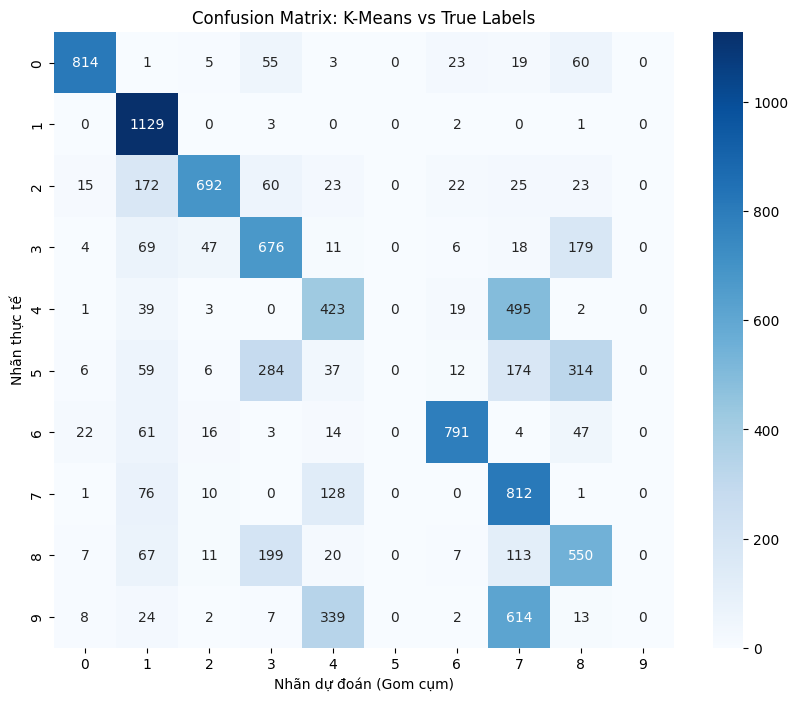

Hình ảnh các tâm cụm tìm được:


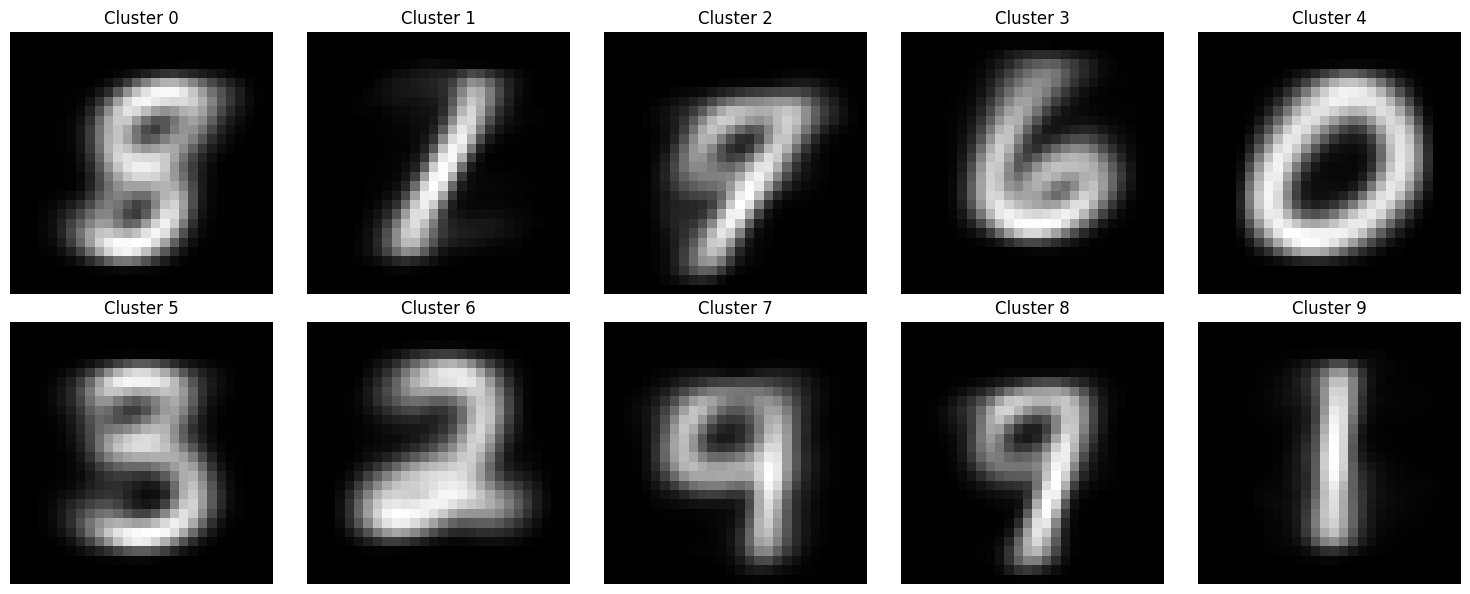

In [1]:
# --- BÀI TẬP: GOM CỤM MNIST BẰNG K-MEANS ---
print("Nguyễn Đức Trung - 6351071072")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_flat = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0
print("Đang thực hiện gom cụm K-Means (vui lòng đợi)...")
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(x_test_flat)

real_labels = np.zeros_like(y_kmeans)
for i in range(10):
    mask = (y_kmeans == i)
    if np.sum(mask) > 0:
        real_labels[mask] = mode(y_test[mask], keepdims=True)[0][0]

acc = accuracy_score(y_test, real_labels)
print(f"Độ chính xác gom cụm (Accuracy): {acc:.4f}")

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, real_labels), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: K-Means vs True Labels')
plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán (Gom cụm)')
plt.show()

print("Hình ảnh các tâm cụm tìm được:")
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centers[i], cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()